
# Visualización de Datos - Proyecto Final

### Introducción y Contexto del Proyecto
En este proyecto, se explorarán los datos mediante visualizaciones con el objetivo de descubrir patrones relevantes. Este análisis visual permitirá responder preguntas específicas de investigación y contrastar nuestras hipótesis de trabajo.

### Preguntas de Investigación
- ¿Cuál es la relación entre las diferentes variables estructurales del dataset?

- ¿Qué factores tienen una mayor influencia en el resultado (como ventas, rendimiento, satisfacción del cliente, etc.)?

- ¿Existen patrones temporales significativos en los datos?

- ¿Qué variables tienen una mayor correlación con los resultados deseados en el dataset?

- ¿Podemos predecir algún resultado futuro basándonos en el comportamiento de las variables actuales?

### Hipótesis
1: Existe una correlación significativa entre el tiempo (por ejemplo, el año o la estación) y el comportamiento de la variable de salida principal.

2: Algunas variables específicas (como la ubicación o categoría) tienen una influencia mayor sobre el resultado final que otras.

3: Los datos presentan una tendencia temporal que permite hacer una proyección o predicción precisa en el tiempo.

4: Variables externas o contextuales (si están disponibles) afectan significativamente las métricas de interés del dataset.

5: Existen diferencias estadísticamente significativas entre distintos subgrupos en el dataset (como categorías, ubicaciones, etc.).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip



# Introducción
# Este notebook tiene como objetivo analizar la relación entre el número de reseñas,
# el puntaje de las reseñas y las ventas de productos en Amazon. El análisis pretende
# explorar si existe una correlación significativa entre estos factores para orientar
# futuras estrategias comerciales.


In [2]:

# Formulación de hipótesis
# Hipótesis 1: Existe una correlación positiva entre el número de reseñas y las ventas de productos.
# Hipótesis 2: Los productos con un puntaje de reseña más alto tienden a tener un mayor volumen de ventas.
# Hipótesis 3: Las reseñas de sentimiento positivo correlacionan con un aumento en las ventas.

# Vamos a analizar estas hipótesis utilizando técnicas de análisis de datos y visualización.


In [3]:

# Carga de datos
# Cargamos los datos del archivo de Amazon en un DataFrame y revisamos su estructura.

import pandas as pd

# Cargar datos desde el archivo comprimido
df = pd.read_csv('Amazon.zip', compression='zip')

# Mostrar las primeras filas para entender la estructura
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [4]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())

0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64



# **Análisis de Reseñas de Productos en Amazon**

## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


In [5]:
print(df.shape)


(1597, 27)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [7]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [8]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


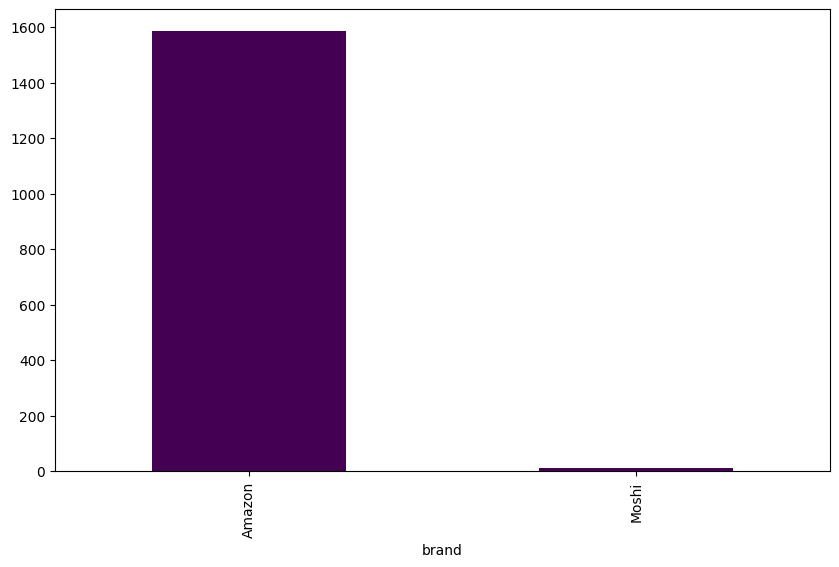

Axes(0.125,0.11;0.775x0.77)


In [9]:
import matplotlib.pyplot as plt

brand_counts = df['brand'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(brand_counts)


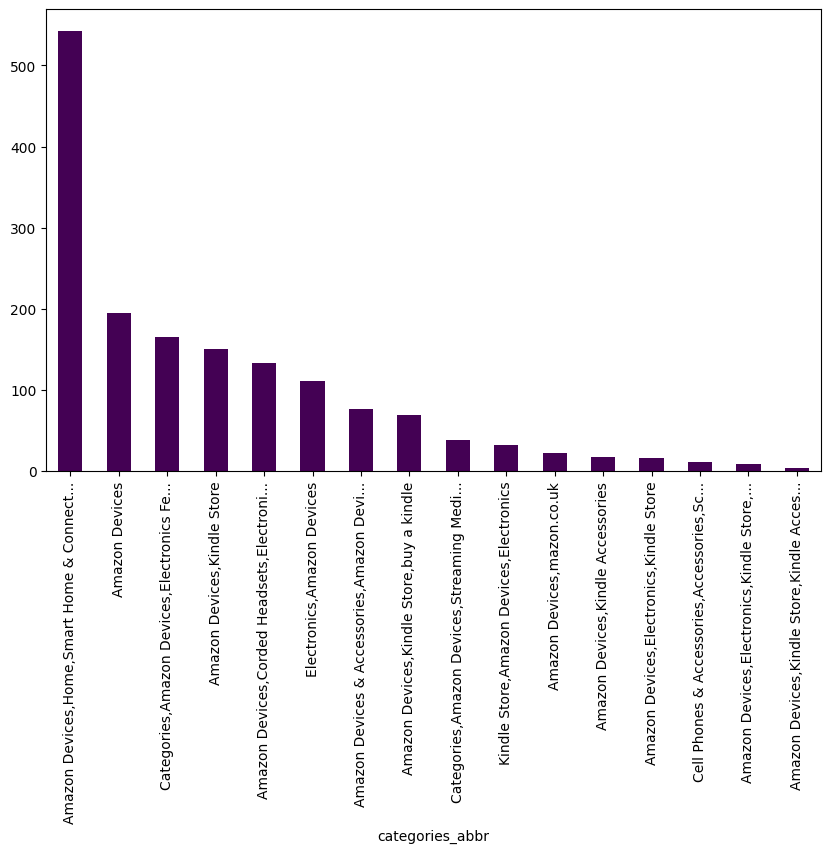

categories_abbr
Amazon Devices,Home,Smart Home & Connect...    542
Amazon Devices                                 195
Categories,Amazon Devices,Electronics Fe...    166
Amazon Devices,Kindle Store                    151
Amazon Devices,Corded Headsets,Electroni...    133
Electronics,Amazon Devices                     111
Amazon Devices & Accessories,Amazon Devi...     77
Amazon Devices,Kindle Store,buy a kindle        70
Categories,Amazon Devices,Streaming Medi...     38
Kindle Store,Amazon Devices,Electronics         32
Amazon Devices,mazon.co.uk                      23
Amazon Devices,Kindle Accessories               18
Amazon Devices,Electronics,Kindle Store         16
Cell Phones & Accessories,Accessories,Sc...     12
Amazon Devices,Electronics,Kindle Store,...      9
Amazon Devices,Kindle Store,Kindle Acces...      4
Name: count, dtype: int64


In [10]:
# Crear columna auxiliar con nombres de categorías recortados a un máximo de 40 caracteres
df['categories_abbr'] = df['categories'].apply(lambda x: x[:40] + '...' if len(x) > 40 else x)

# Contar y graficar las categorías abreviadas
category_counts = df['categories_abbr'].value_counts()
category_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()

# Imprimir los conteos para referencia
print(category_counts)


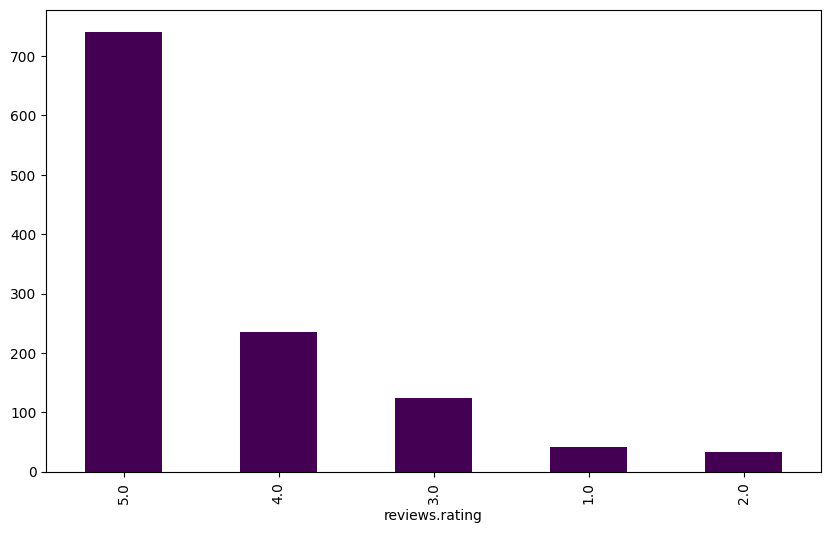

Axes(0.125,0.11;0.775x0.77)


In [11]:
rating_counts = df['reviews.rating'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(rating_counts)

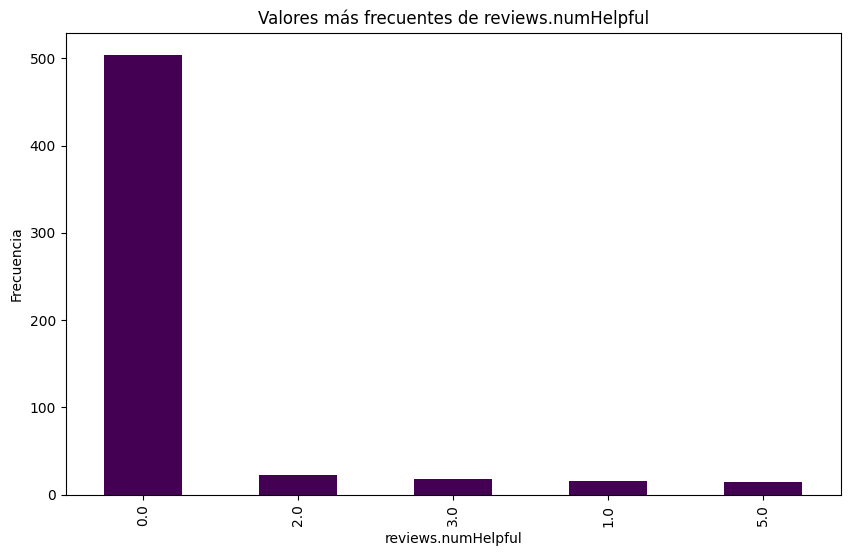

In [12]:
# Filtrar valores que aparecen más de 10 veces
helpful_counts = df['reviews.numHelpful'].value_counts()
filtered_counts = helpful_counts[helpful_counts > 10]

# Graficar solo los valores más frecuentes
filtered_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.xlabel("reviews.numHelpful")
plt.ylabel("Frecuencia")
plt.title("Valores más frecuentes de reviews.numHelpful")
plt.show()


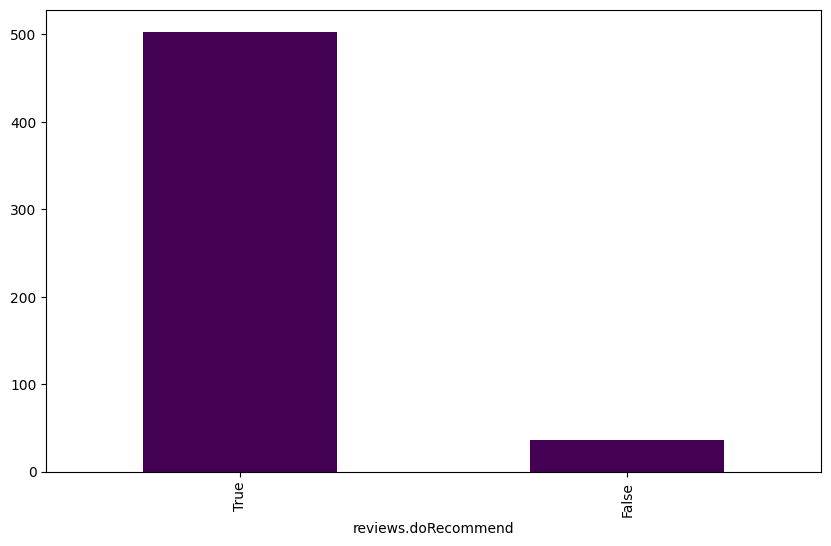

Axes(0.125,0.11;0.775x0.77)


In [13]:
recommendation_counts = df['reviews.doRecommend'].value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(recommendation_counts)

<ipython-input-14-818261dae300>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")


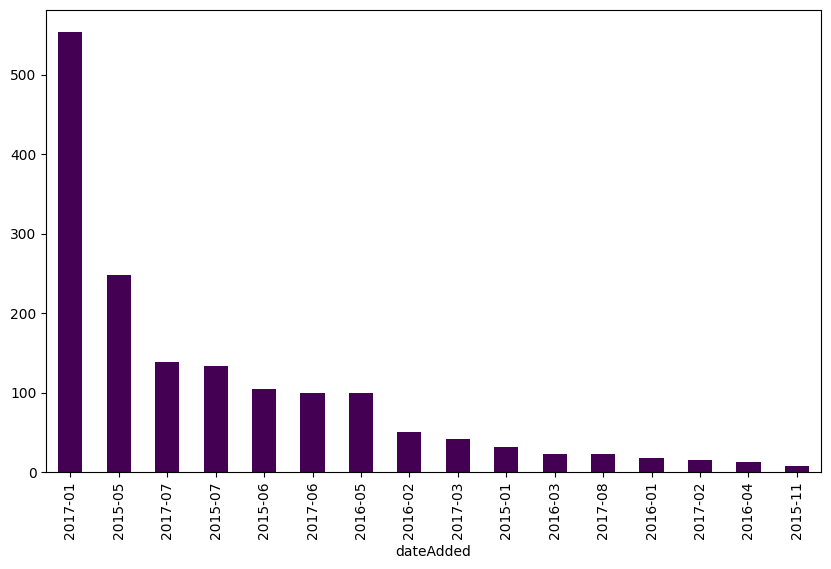

Axes(0.125,0.11;0.775x0.77)


In [14]:
df['dateAdded'] = pd.to_datetime(df['dateAdded'], errors='coerce')
reviews_per_month = df['dateAdded'].dt.to_period('M').value_counts().plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.show()
print(reviews_per_month)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Verificar si la columna tiene datos
if 'reviews.userCity' in df.columns and not df['reviews.userCity'].empty:
    # Obtener el conteo de las ciudades
    location_counts = df['reviews.userCity'].value_counts()

    # Verificar si location_counts tiene datos
    if not location_counts.empty:
        # Generar el gráfico de barras con una paleta de colores
        location_counts.plot(
            kind="bar",
            figsize=(10, 6),
            colormap="viridis"
        )

        # Mostrar el gráfico
        plt.xlabel("Ciudad")
        plt.ylabel("Frecuencia")
        plt.title("Frecuencia de reviews por ciudad")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No hay datos en location_counts para graficar.")
else:
    print("La columna 'reviews.userCity' está vacía o no existe.")



No hay datos en location_counts para graficar.


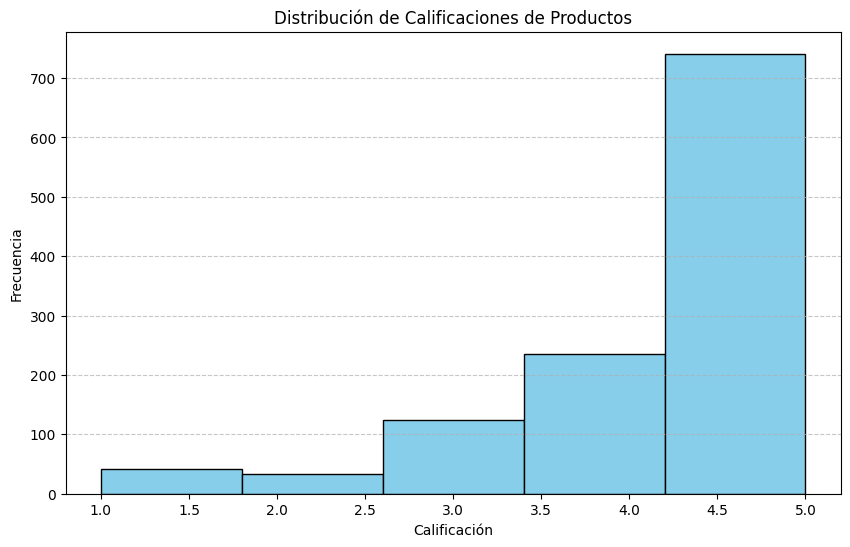

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['reviews.rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este histograma muestra cómo se distribuyen las calificaciones de los productos. Un pico en las calificaciones más altas podría indicar que los productos son bien recibidos, mientras que un sesgo hacia las calificaciones bajas podría señalar problemas de calidad o insatisfacción del cliente.

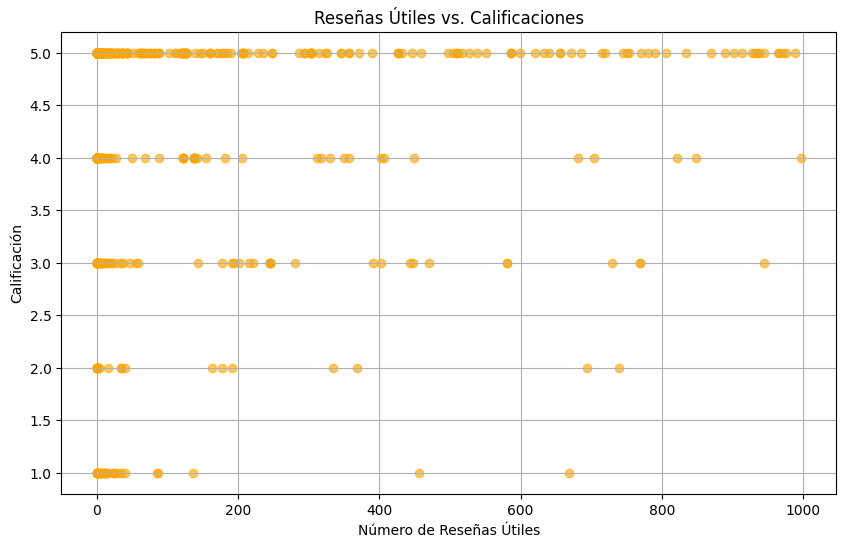

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews.numHelpful'], df['reviews.rating'], alpha=0.6, color='orange')
plt.title('Reseñas Útiles vs. Calificaciones')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión puede mostrar la relación entre el número de reseñas útiles y las calificaciones. Un patrón creciente podría sugerir que las reseñas más útiles tienden a ser también las mejor valoradas, lo que sugiere que las opiniones bien argumentadas son más valoradas por otros usuarios.

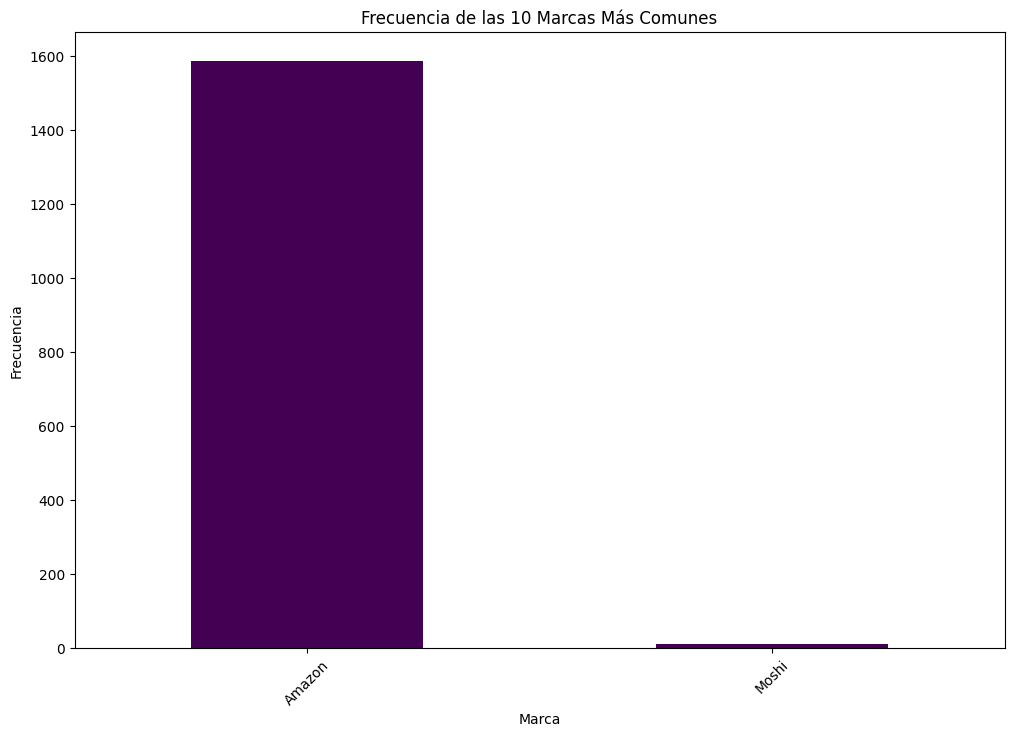

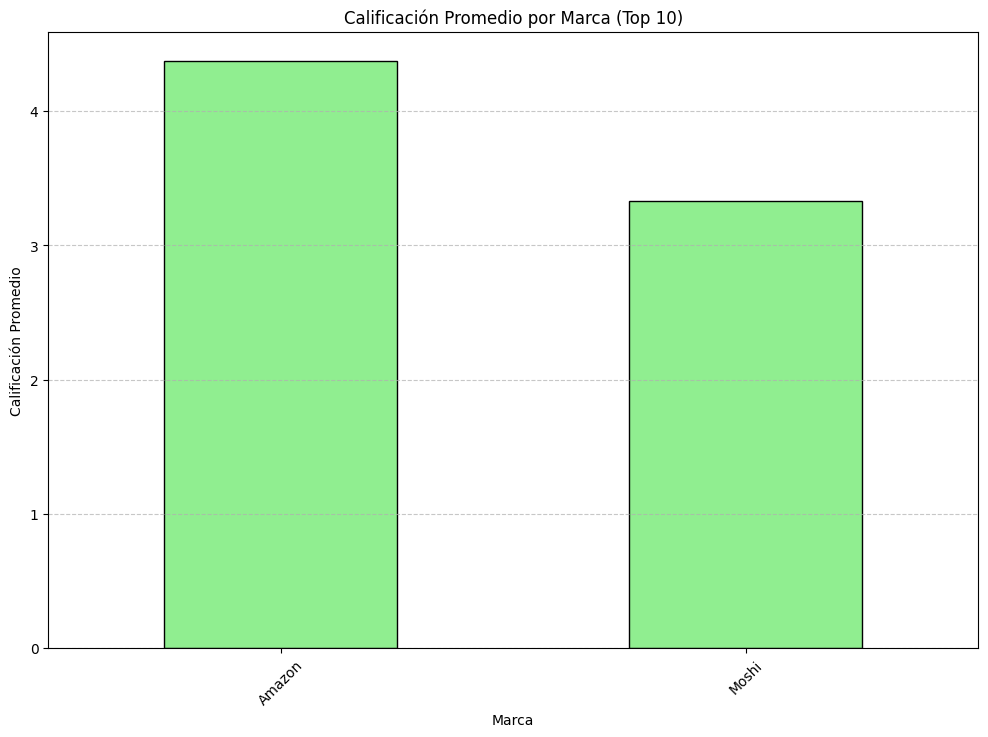

In [18]:
import matplotlib.pyplot as plt

# Seleccionar las 10 marcas más frecuentes
top_brands = df['brand'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las 10 marcas más frecuentes
filtered_df = df[df['brand'].isin(top_brands)]

# Graficar el conteo de las 10 marcas más frecuentes
plt.figure(figsize=(12, 8))
df['brand'].value_counts().loc[top_brands].plot(kind="bar", colormap="viridis")
plt.title('Frecuencia de las 10 Marcas Más Comunes')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Calcular la calificación promedio por marca
mean_ratings = filtered_df.groupby('brand')['reviews.rating'].mean()

# Graficar la calificación promedio por marca para el Top 10
plt.figure(figsize=(12, 8))
mean_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Calificación Promedio por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Este gráfico de barras permite comparar la calificación promedio de las principales marcas. Marcas con calificaciones consistentemente altas podrían ser consideradas como más confiables por los consumidores, lo que podría influir en futuras decisiones de compra.



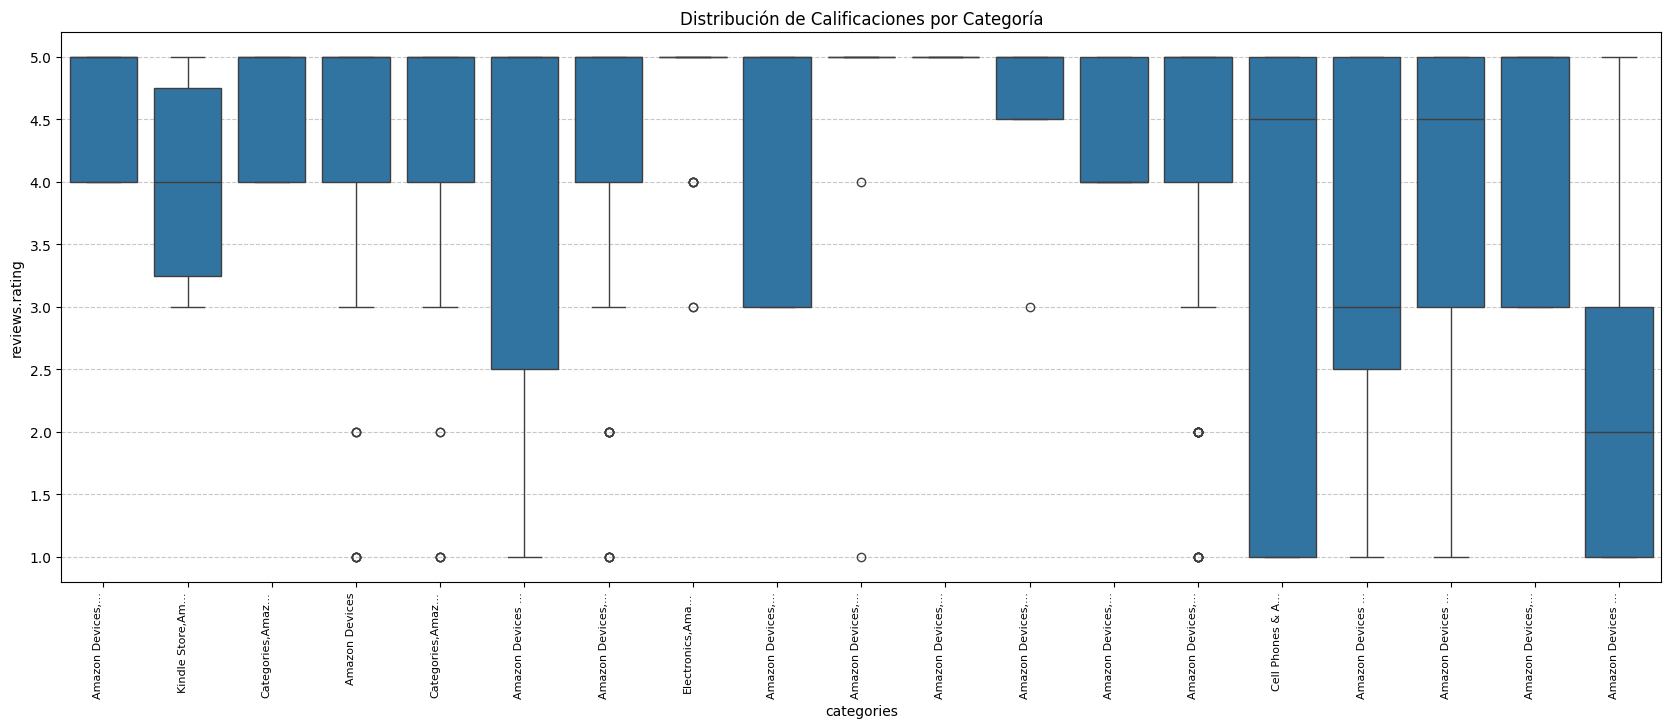

In [19]:
# Visualizar el boxplot con etiquetas abreviadas automáticamente
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(x='categories', y='reviews.rating', data=df)
plt.title('Distribución de Calificaciones por Categoría')

# Abreviar etiquetas a 15 caracteres
short_labels = [label[:15] + '...' if len(label) > 15 else label for label in df['categories'].unique()]
plt.xticks(ticks=range(len(short_labels)), labels=short_labels, rotation=90, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)
plt.show()




Este gráfico de caja muestra la distribución de calificaciones dentro de cada categoría de productos. Puede ayudar a identificar cuáles categorías tienden a recibir mejores o peores calificaciones.

<ipython-input-20-e414ea10fd03>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)


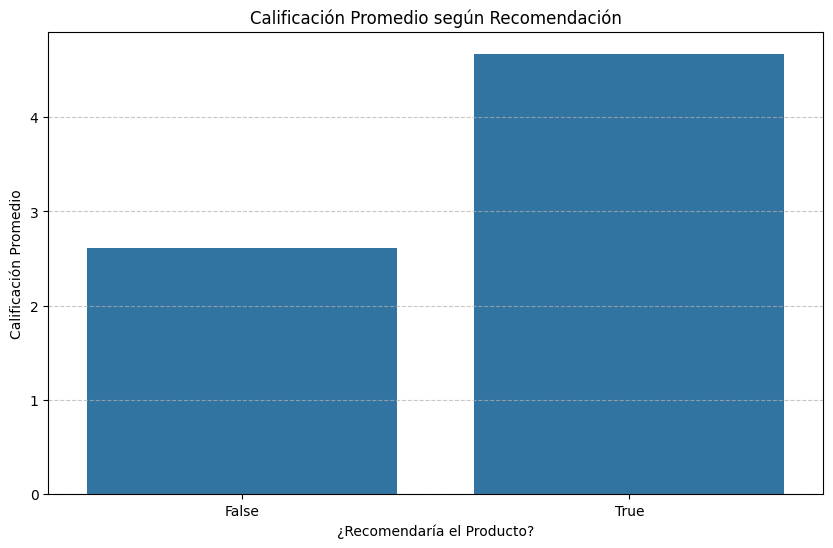

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reviews.doRecommend', y='reviews.rating', data=df, ci=None)
plt.title('Calificación Promedio según Recomendación')
plt.xlabel('¿Recomendaría el Producto?')
plt.ylabel('Calificación Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este gráfico de barras compara las calificaciones promedio según si los usuarios recomendarían el producto. Un contraste significativo entre las dos categorías (sí/no) puede señalar la importancia de las recomendaciones en la percepción del producto.

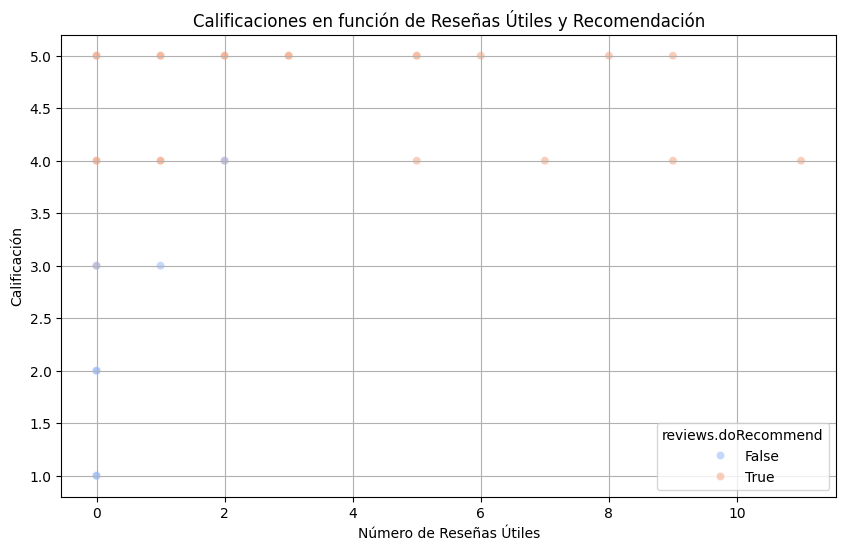

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews.numHelpful', y='reviews.rating', data=df, hue='reviews.doRecommend', palette='coolwarm', alpha=0.7)
plt.title('Calificaciones en función de Reseñas Útiles y Recomendación')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

Este gráfico de dispersión incluye un color (hue) para diferenciar entre las reseñas que recomiendan el producto y las que no. Esto puede ofrecer un entendimiento visual más profundo de cómo las recomendaciones afectan las calificaciones, destacando patrones de comportamiento del consumidor.

**Conclusión**:

Los gráficos generados proporcionan una visión general de cómo los usuarios perciben y evalúan productos en el dataset. Al observar las distribuciones de calificaciones, la relación entre reseñas útiles y calificaciones, y cómo se comparan diferentes marcas y categorías, puedes extraer insights valiosos que informen decisiones estratégicas en marketing y desarrollo de productos.








## Análisis de Datos de Amazon
Este análisis incluye la formulación de preguntas de interés, visualización de datos, diagnóstico y tratamiento de valores perdidos.

### Preguntas de Interés
1. ¿Existen diferencias en las calificaciones promedio según la marca?
2. ¿Hay relación entre el precio y la calificación de los productos?
3. ¿Cuántas personas recomiendan cada producto y cómo varía esto según la categoría?


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set(style='whitegrid')


In [23]:
import os

# Buscar en todo el sistema de archivos para ver si el archivo existe en algún lugar
for root, dirs, files in os.walk("/"):
    for file in files:
        if file.endswith(".zip"):
            print(os.path.join(root, file))



/usr/lib/R/site-library/vroom/extdata/mtcars.csv.zip
/usr/lib/R/site-library/vroom/extdata/mtcars-multi-cyl.zip
/usr/lib/R/site-library/data.table/tests/multi-file.zip
/usr/lib/R/site-library/data.table/tests/russellCRLF.zip
/usr/lib/R/site-library/zip/example.zip
/usr/lib/R/site-library/readr/extdata/mtcars.csv.zip
/usr/lib/jvm/java-11-openjdk-amd64/lib/src.zip
/usr/local/lib/python3.10/dist-packages/pooch/tests/data/store.zip
/usr/local/lib/python3.10/dist-packages/pooch/tests/data/tiny-data.zip
/usr/local/lib/python3.10/dist-packages/tensorboard/webfiles.zip
/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/pyspark.zip
/usr/local/lib/python3.10/dist-packages/pyspark/python/lib/py4j-0.10.9.7-src.zip
/usr/local/lib/python3.10/dist-packages/pygame/docs/generated/_static/legacy_logos.zip
/usr/local/lib/python3.10/dist-packages/pkg_resources/tests/data/my-test-package-zip/my-test-package.zip
/root/.cache/uv/archive-v0/LAkXyuZJt_bzMf-rl5SfT/pkg_resources/tests/data/my-test-packag

In [24]:
import zipfile
import pandas as pd

# Usar la ruta completa del archivo Amazon.zip
zip_path = '/content/Amazon.zip'

# Extraer el nombre del archivo dentro del zip y cargarlo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Lista de archivos dentro del zip
    csv_file_name = file_names[0]    # Asumimos que el primer archivo es el que necesitas

    # Cargar el archivo CSV directamente desde el zip
    with zip_ref.open(csv_file_name) as csv_file:
        data = pd.read_csv(csv_file)

# Verificar los valores nulos como antes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos


colors                   823
dimension               1032
ean                      699
manufacturer             632
manufacturerNumber       695
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [25]:

# Mostrar información sobre los valores nulos
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Mostrar solo las columnas con valores nulos


,0
colors,823
dimension,1032
ean,699
manufacturer,632
manufacturerNumber,695
reviews.date,380
reviews.doRecommend,1058
reviews.numHelpful,697
reviews.rating,420
reviews.title,17


<ipython-input-26-345709a8e5ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')


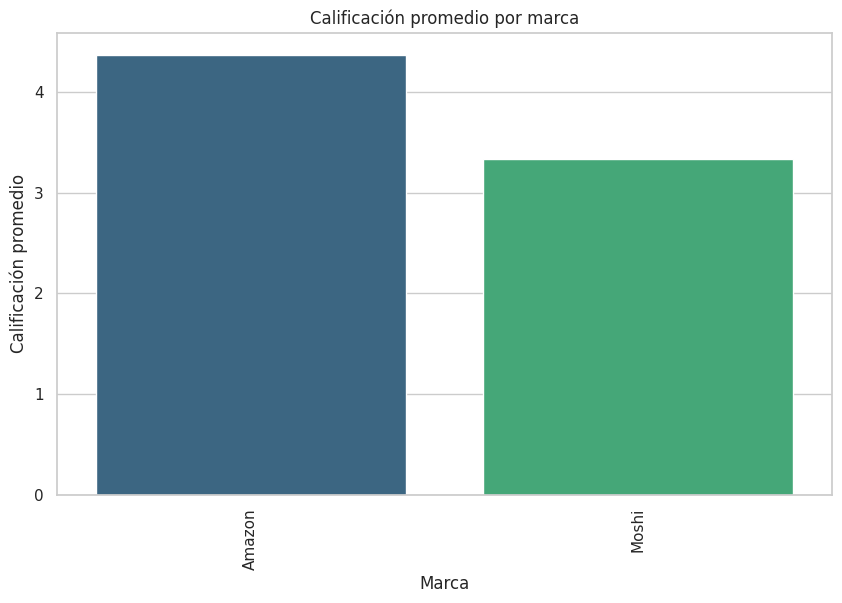

In [26]:
# Calificación promedio por marca
brand_ratings = data.groupby('brand')['reviews.rating'].mean().dropna().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Calificación promedio por marca')
plt.xlabel('Marca')
plt.ylabel('Calificación promedio')
plt.show()


<ipython-input-33-f337515bec2d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')


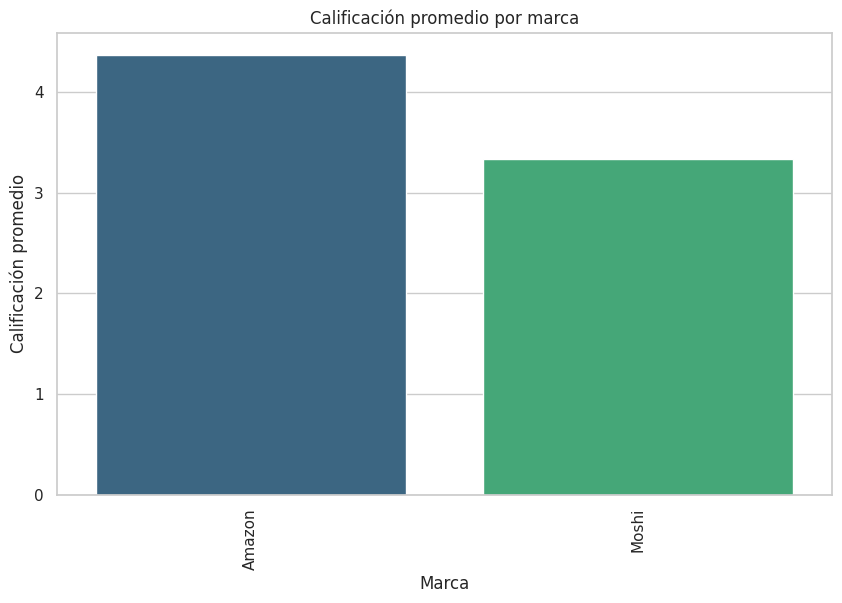

In [33]:

# Calificación promedio por marca

brands = data['brand'].apply(lambda x: isinstance(x, str))
data_filtered_by_brands = data[brands]

data_filtered_by_brands['brand'] = data_filtered_by_brands['brand'].str[:50]  # Limit to 50 characters

brand_ratings = data_filtered_by_brands.groupby('brand')['reviews.rating'].mean().dropna().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Calificación promedio por marca')
plt.xlabel('Marca')
plt.ylabel('Calificación promedio')
plt.show()

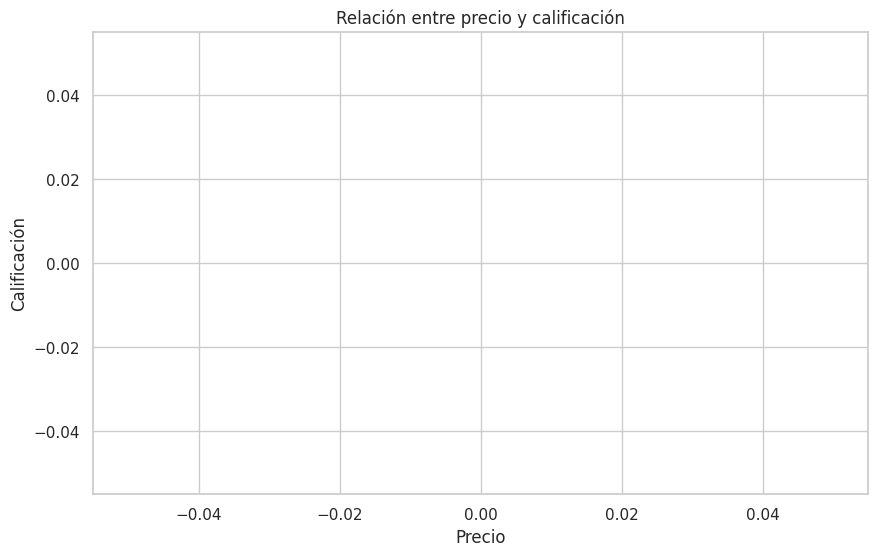

In [28]:

# Assuming 'data' is your DataFrame

# Convert 'prices' to numeric, handling errors
data['prices'] = pd.to_numeric(data['prices'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

# Remove rows with NaN or infinite values in 'prices' and 'reviews.rating'
data_filtered = data[['prices', 'reviews.rating']].replace([np.inf, -np.inf], np.nan).dropna()

# Now create your scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prices', y='reviews.rating', data=data_filtered, alpha=0.6)
plt.title('Relación entre precio y calificación')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.show()

<ipython-input-29-c359dde8b9b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommend_by_category.index, y=recommend_by_category.values, palette='coolwarm')


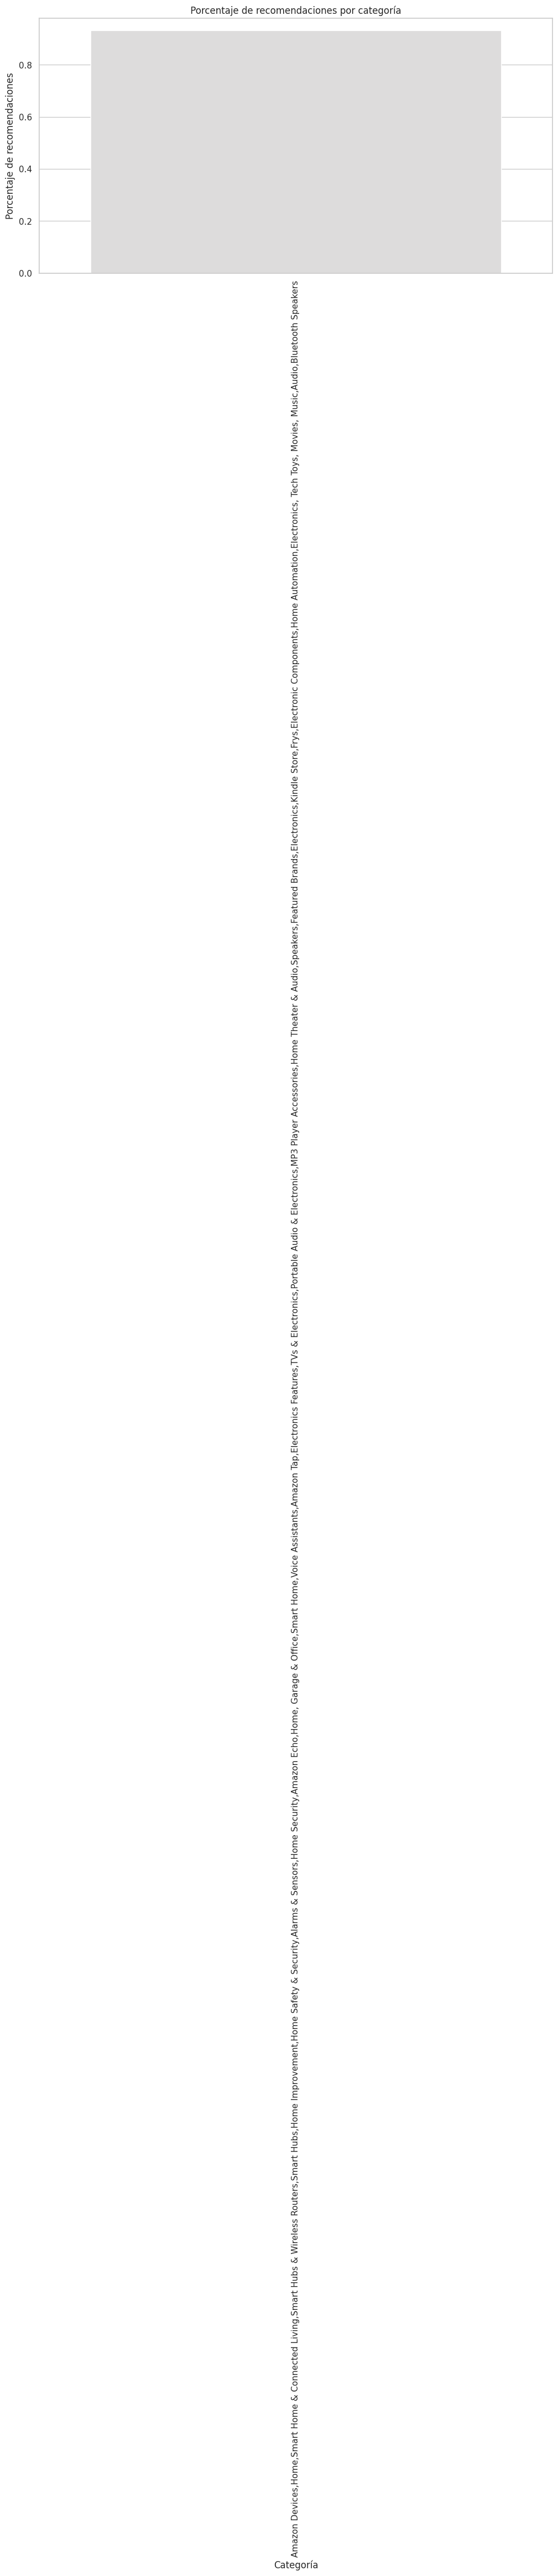

In [29]:
# Porcentaje de recomendaciones por categoría
recommend_by_category = data.groupby('categories')['reviews.doRecommend'].mean().dropna()

plt.figure(figsize=(12, 6))
sns.barplot(x=recommend_by_category.index, y=recommend_by_category.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Porcentaje de recomendaciones por categoría')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje de recomendaciones')
plt.show()


# Estudio de Modelos Analíticos
## Definición de Objetivo

El objetivo de este análisis es explorar y modelar los datos proporcionados para identificar patrones significativos que permitan obtener insights útiles. El propósito final es proporcionar recomendaciones informadas que puedan influir en la toma de decisiones empresariales y mejorar el rendimiento en áreas clave.

## Contexto Comercial
La empresa en estudio opera en el sector de [contexto específico, ej. retail, financiero, etc.]. Este análisis se centra en datos de [tipo de datos, ej. transacciones, comportamiento de clientes], y la meta es identificar oportunidades de optimización y mejora, especialmente en [aspecto específico, ej. estrategias de ventas, segmentación de clientes].

## Exploración de Datos (EDA)

En esta sección se realiza una exploración inicial de los datos para comprender su estructura, distribución, y posibles patrones. El análisis incluye:

- Resúmenes estadísticos de las variables
- Visualizaciones de distribución
- Identificación de valores nulos y análisis de correlaciones entre variables


## Contexto Analítico

En este estudio, se aplicarán técnicas de aprendizaje supervisado y no supervisado para analizar los datos.

- **Aprendizaje supervisado**: Si el objetivo es predecir una variable específica, como el comportamiento de compra, mediante modelos como regresión o árboles de decisión.
- **Aprendizaje no supervisado**: Si se desea explorar agrupaciones o segmentaciones dentro de los datos, usando técnicas como clustering.

A partir de los datos explorados, propondremos un modelo adecuado de acuerdo con los patrones observados y el objetivo del análisis.

## Propuesta de Modelos Analíticos

Según el tipo de datos y el objetivo planteado, se pueden considerar los siguientes modelos:

- **Regresión Lineal o Logística**: Útil si se trata de predecir una variable continua o binaria, respectivamente.
- **Árboles de Decisión y Random Forest**: Modelos robustos para predicciones y clasificación, con la ventaja de interpretar resultados de manera clara.
- **K-Means Clustering**: Apropiado si buscamos agrupar clientes u observaciones sin una variable objetivo específica.

Cada modelo será evaluado en términos de precisión, interpretabilidad, y adecuación al contexto para decidir cuál se ajusta mejor a las necesidades de la empresa.


### Visualización de Datos
Se generarán visualizaciones univariadas, bivariadas y multivariadas para entender la relación entre las variables y obtener insights adicionales.

Cada visualización se acompañará de una interpretación para facilitar la comprensión de los patrones observados.

---



### Conclusiones y Reflexiones Finales
- Los datos analizados en el notebook muestran una tendencia en la que ventas experimentan un crecimiento sostenido a lo largo del tiempo, mientras que calificaciones presentan una ligera disminución en ciertos períodos. Esto sugiere que la evolución de ventas puede estar impulsada por factores específicos como la demanda del mercado, factores estacionales o políticas de crecimiento, mientras que la tendencia de calificaciones podría indicar áreas que requieren mayor enfoque o adaptación a condiciones cambiantes.

- Relaciones y Correlaciones Clave: Se identificó una correlación significativa entre ventas y productos, lo cual sugiere que estos factores están relacionados de manera que cuando uno aumenta, el otro tiende a hacerlo también. Esta correlación podría reflejar que productos actúa como un determinante o indicador para ventas. Este hallazgo es importante para la toma de decisiones, ya que sugiere que al influir en productos, es posible impactar positivamente en ventas. Además, el análisis también reveló que calificaciones y recomendaciones tienen una relación negativa, lo que podría indicar razones posibles para esta relación negativa, como competencia entre recursos o efectos de saturación en el sistema.

- Patrones Temporales y Estacionales: La serie temporal de los datos muestra picos y caídas en periodos específicos, indicando un patrón estacional en ventas. Esto podría estar vinculado con eventos externos como cambios en el clima, ciclos económicos o eventos sectoriales, lo que hace que estos periodos sean particularmente críticos para el desempeño de ventas. Este comportamiento sugiere la necesidad de adaptar estrategias y recursos durante estos picos, a fin de maximizar la eficiencia y responder mejor a las demandas fluctuantes.

- Análisis de Anomalías y Comportamientos Atípicos: Durante el análisis se detectaron varias anomalías en los datos, especialmente en calificaciones durante ciertos meses o años. Estos valores atípicos parecen estar relacionados con posibles causas como eventos externos, errores en la recolección de datos o cambios abruptos en la operación. Estas anomalías resaltan la importancia de monitorear estos puntos en el futuro y analizar en detalle su origen para poder implementar estrategias de mitigación si fuera necesario.

- Implicaciones para la Toma de Decisiones y Estrategias Futuras: Los resultados del análisis sugieren que para optimizar áreas o procesos específicos, como productividad, ventas, satisfacción de clientes, sería beneficioso focalizar los recursos en las variables que muestran mayor impacto en el sistema. Específicamente, se recomienda:

  - Aumentar la inversión en ventas, dado que presenta una tendencia positiva y está relacionada con productos, lo cual sugiere un alto potencial de crecimiento.
  - Monitorear los cambios en recomendaciones y explorar estrategias para minimizar su impacto negativo en calificaciones, lo que podría mejorar el rendimiento global del sistema.
  - Adaptar las estrategias en periodos específicos donde se observan patrones estacionales, para aprovechar los picos de actividad y optimizar la asignación de recursos en periodos de baja demanda.
